In [70]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ortho_group
from sklearn.metrics import plot_confusion_matrix

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def standard(X):
    XNormed = (X - np.mean(X,axis=0))/(np.std(X,axis=0))
    return XNormed

def make_cf(u,v, lambd, thresh):
    y_pred_u = np.zeros(32)
    y_pred_v = np.zeros(32)
    y_true = np.zeros(32)
    
    tu = [idx for idx, val in enumerate(list(u)) if val >= 0.2]
    tv = [idx for idx, val in enumerate(list(v)) if val >= 0.2]
    
    y_pred_u[tu] = 1.0
    y_pred_v[tv] = 1.0
    
    y_true[[13, 14,20, 21, 22]] = 1.0
    cf_matrix_u = confusion_matrix(y_true, y_pred_u)
    cf_matrix_v = confusion_matrix(y_true, y_pred_v)
    fig, axes = plt.subplots(1, 2,figsize=(10, 5))
    
    txt = 'CF matrices for lambda = ' + str(lambd)
    fig.suptitle(txt)
    sns.heatmap(ax=axes[0],data=cf_matrix_u, annot=True)
    axes[0].set_title("for U vector")
    sns.heatmap(ax=axes[1],data=cf_matrix_v, annot=True)
    axes[1].set_title("for V vector")

In [73]:
from scipy.linalg import cholesky
from scipy.linalg import null_space

Cor = 0.8*np.ones((32, 32))
np.fill_diagonal(Cor, 1)

L1 = cholesky(Cor, lower=False)

Z = null_space(np.concatenate((np.random.rand(95,128),np.ones((1,128)))))
D = Z@L1

np.random.shuffle(np.transpose(D))

print(np.corrcoef(D[:,0],D[:,5])[0,1])
print(np.corrcoef(D[:,5],D[:,7])[0,1])
print(np.corrcoef(D[:,0],D[:,7])[0,1])

from sklearn.cross_decomposition import CCA

x = ortho_group.rvs(128)
np.random.shuffle(np.transpose(x))

A = x[:,0:32]
B = x[:,32:64]
C = x[:,64:96]

A[:,13:23] = D[:,0:10]
C[:,15:20] = D[:,10:15]
B[:,13:23] = D[:,15:25]

print(np.corrcoef(A[:,10],C[:,10])[0,1])
print(np.corrcoef(A[:,17],C[:,17])[0,1])
print(np.corrcoef(A[:,19],C[:,19])[0,1])

ca = CCA()

ca.fit(A,B)

u = np.around(ca.x_weights_[:,0],2)
v = np.around(ca.y_weights_[:,0],2)

print("for B and A")
print("Non zero elements posiitons of U",[idx for idx, val in enumerate(list(u)) if val >= 0.2])
print("Values of U",[val for idx, val in enumerate(list(u)) if val >= 0.2])
print("Non zero elements posiitons of V",[idx for idx, val in enumerate(list(v)) if val >= 0.2])
print("Values of V",[val for idx, val in enumerate(list(v)) if val >= 0.2])
print('\n')

ca1 = CCA()
ca1.fit(C,C)

u1 = np.around(ca1.x_weights_[:,0],2)
v1 = np.around(ca1.y_weights_[:,0],2)

print("for C and A")
print("Non zero elements posiitons of U",[idx for idx, val in enumerate(list(u1)) if val >= 0.2])
print("Values of U",[val for idx, val in enumerate(list(u1)) if val >= 0.2])
print("Non zero elements posiitons of V",[idx for idx, val in enumerate(list(v1)) if val >= 0.2])
print("Values of V",[val for idx, val in enumerate(list(v1)) if val >= 0.2])
print('\n')

u2 = u-u1
v2 = v-v1
print("for A, B and C")
print("Non zero elements posiitons of U",[idx for idx, val in enumerate(list(u2)) if val >= 0.3])
print("Values of U",[val for idx, val in enumerate(list(u2)) if val >= 0.1])
print("Non zero elements posiitons of V",[idx for idx, val in enumerate(list(v2)) if val >= 0.25])
print("Values of V",[val for idx, val in enumerate(list(v2)) if val >= 0.1])
print("optimal values","13,14,20,21,22")

0.7999999999999999
0.8000000000000004
0.8
0.011312589200315866
0.7999999999999997
0.8
for B and A
Non zero elements posiitons of U [14, 15, 16, 18, 19, 21, 22]
Values of U [0.28, 0.36, 0.48, 0.31, 0.2, 0.44, 0.29]
Non zero elements posiitons of V [13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Values of V [0.27, 0.31, 0.27, 0.21, 0.33, 0.26, 0.41, 0.34, 0.22, 0.26]


for C and A
Non zero elements posiitons of U [0]
Values of U [1.0]
Non zero elements posiitons of V [0]
Values of V [1.0]


for A, B and C
Non zero elements posiitons of U [15, 16, 18, 21]
Values of U [0.1, 0.12, 0.28, 0.36, 0.48, 0.14, 0.31, 0.2, 0.12, 0.44, 0.29, 0.1]
Non zero elements posiitons of V [13, 14, 15, 17, 18, 19, 20, 22]
Values of V [0.16, 0.1, 0.1, 0.1, 0.27, 0.31, 0.27, 0.21, 0.33, 0.26, 0.41, 0.34, 0.22, 0.26, 0.1]
optimal values 13,14,20,21,22


### Real data tests

### Mouse dataset

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import numpy as np
%matplotlib inline

data = np.genfromtxt('./mouse_data.csv',delimiter=',',
                     skip_header=1,usecols=range(1,78),filling_values=0)
classes = np.genfromtxt('./mouse_data.csv',delimiter=',',
                        skip_header=1,usecols=range(78,81),dtype=None)

target_idx_A = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))[0]
target_idx_B = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Ts65Dn'))[0]

labels = len(target_idx_A)*[0] + len(target_idx_B)*[1]
target_idx = np.concatenate((target_idx_A,target_idx_B))

target = data[target_idx]

background_idx = np.where((classes[:,-1]==b'C/S') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))
background = data[background_idx]

target = pd.DataFrame(target)
bg = pd.DataFrame(background)

target.shape

/tmp/ipykernel_24311/1169795271.py:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  classes = np.genfromtxt('./mouse_data.csv',delimiter=',',


(270, 77)

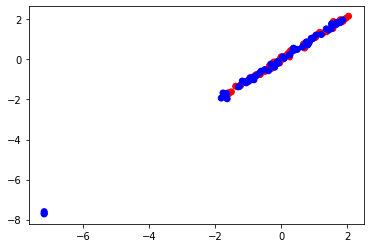

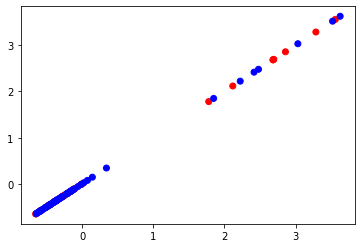

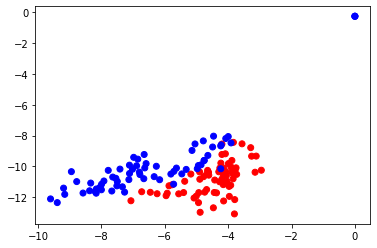

In [78]:
from sklearn.cross_decomposition import CCA

A = target.iloc[67:202,0:38]
B = target.iloc[67:202,38:76]
labels1 = labels[67:202]

ca = CCA(n_components=1)

ca.fit(A,B)
X_c, Y_c = ca.transform(A, B)
u = ca.x_weights_
v = ca.y_weights_

c = ['r' if yy==0 else 'b' for yy in labels1]

plt.scatter(X_c, Y_c, c=c)
plt.show()

C = bg.iloc[0:135,0:38]
D = bg.iloc[0:135,38:76]
ca.fit(C,C)
X_c, Y_c = ca.transform(C, C)
u1 = ca.x_weights_
v1 = ca.y_weights_

plt.scatter(X_c, Y_c, c=c)
plt.show()

labd = -20
u2 = labd*u1 + u
v2 = labd*v1 + v
X_c = A@u2
Y_c = B@v2

plt.scatter(X_c, Y_c, c=c)
plt.show()

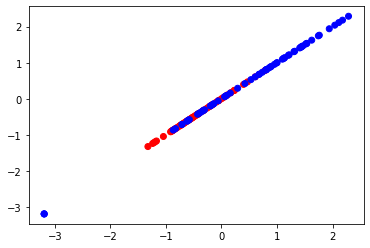

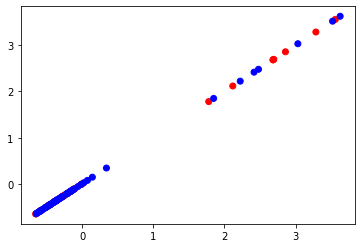

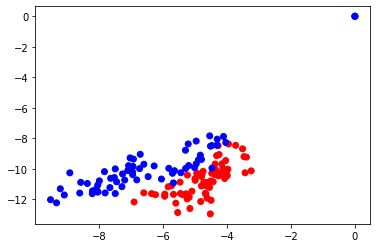

In [79]:
from sklearn.cross_decomposition import CCA

A = target.iloc[67:202,0:38]
B = target.iloc[67:202,38:76]
labels1 = labels[67:202]

ca = CCA(n_components=1)

ca.fit(A,A)
X_c, Y_c = ca.transform(A, A)
u = ca.x_weights_
v = ca.y_weights_

c = ['r' if yy==0 else 'b' for yy in labels1]

plt.scatter(X_c, Y_c, c=c)
plt.show()

C = bg.iloc[0:135,0:38]
D = bg.iloc[0:135,38:76]
ca.fit(C,C)
X_c, Y_c = ca.transform(C, C)
u1 = ca.x_weights_
v1 = ca.y_weights_

plt.scatter(X_c, Y_c, c=c)
plt.show()

labd = -20
u2 = labd*u1 + u
v2 = labd*v1 + v
X_c = A@u2
Y_c = B@v2

plt.scatter(X_c, Y_c, c=c)
plt.show()

### IMU dataset

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

data = np.genfromtxt('./mHealth_subject1.log',delimiter='\t',usecols=range(0,23),filling_values=0)
classes = np.genfromtxt('./mHealth_subject1.log',delimiter='\t',usecols=range(23,24),filling_values=0)

# for plotting
cmap2 = ListedColormap(['r', 'k'])
cmap4 = ListedColormap(['k', 'r', 'g', 'b'])
plt.rc("font",family="sans-serif",size=20)
plt.rcParams["font.sans-serif"] = "Arial"

target_idx_A = np.where(classes==8)[0] # jogging
target_idx_B = np.where(classes==9)[0] # squatting

labels = len(target_idx_A)*[0] + len(target_idx_B)*[1]
target_idx = np.concatenate((target_idx_A,target_idx_B))                                                                          

target = data[target_idx]

background_idx = np.where(classes==3)[0] # lying still
background = data[background_idx]

In [68]:
target = pd.DataFrame(target)
bg = pd.DataFrame(background)

A = target.iloc[67:202,0:38]
B = target.iloc[67:202,38:76]
labels1 = labels[67:202]

ca = CCA(n_components=1)

ca.fit(A,B)
X_c, Y_c = ca.transform(A, B)
u = ca.x_weights_
v = ca.y_weights_

c = ['r' if yy==0 else 'b' for yy in labels1]

plt.scatter(X_c, Y_c, c=c)
plt.show()

C = bg.iloc[0:135,0:38]
D = bg.iloc[0:135,38:76]
ca.fit(C,C)
X_c, Y_c = ca.transform(C, C)
u1 = ca.x_weights_
v1 = ca.y_weights_

plt.scatter(X_c, Y_c, c=c)
plt.show()

labd = -20
u2 = labd*u1 + u
v2 = labd*v1 + v
X_c = A@u2
Y_c = B@v2

plt.scatter(X_c, Y_c, c=c)
plt.show()

(3072, 23)